In [1]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "Austin"

import os


def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

In [24]:
region = 'Austin'
df_dict = {}
dfc_dict = {}
m = {}
d= {}
# Finding common homes
for year in [2014, 2015]:
    df_dict[year], dfc_dict[year] = create_matrix_single_region(region, year)
common_homes = df_dict[2014].index.intersection(df_dict[2015].index)
common_homes

Int64Index([  22,   26,   59,   68,   77,   86,   93,   94,  101,  114,
            ...
            9932, 9933, 9935, 9937, 9938, 9939, 9942, 9971, 9981, 9982],
           dtype='int64', length=468)

In [27]:
for year in [2014, 2015]:
    mean_df = df_dict[year].ix[common_homes][['aggregate_%d' %month for month in range(1, 13)]].mean()
    mean_df.index = range(1, 13)
    m[year] = mean_df
    dd = pd.Series(dds[year][region], index=range(1, 13))
    d[year] = dd
    

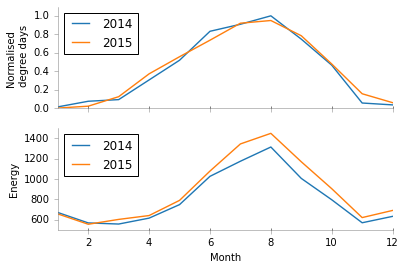

In [47]:
from plot_functions import *
fig, ax = plt.subplots(nrows=2, sharex=True)
pd.DataFrame(d).plot(ax=ax[0], color=tableau20blind[::2], linewidth=1.4)
pd.DataFrame(m).plot(ax=ax[1], color=tableau20blind[::2], linewidth=1.4)
format_axes(ax[0])
format_axes(ax[1])
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Energy")
ax[0].set_ylim((0, 1.1))

ax[0].set_ylabel("Normalised \n degree days")

In [33]:
df_dict[2014].ix[common_homes][['aggregate_%d' %month for month in range(1, 13)]].describe()

,aggregate_1,aggregate_2,aggregate_3,aggregate_4,aggregate_5,aggregate_6,aggregate_7,aggregate_8,aggregate_9,aggregate_10,aggregate_11,aggregate_12
count,294.000000,311.000000,350.000000,370.000000,386.000000,396.000000,410.000000,428.000000,437.000000,448.000000,451.000000,449.000000
mean,670.679365,567.849066,556.758839,615.107947,748.242007,1027.024470,1175.876624,1316.002291,1006.506477,796.196072,569.402580,632.461624
std,357.397661,291.062211,269.470357,351.131044,437.697091,568.507774,656.529997,744.531656,585.004957,450.958271,306.685628,347.858554
min,73.628365,58.439449,74.624779,77.954910,92.283058,63.819134,109.466499,118.904648,159.600296,129.998779,75.983116,82.582550
25%,419.517281,369.412292,352.101738,343.001808,405.673035,585.323792,670.790298,745.403458,555.100037,455.514648,341.702484,383.294556
50%,595.286224,497.242615,508.032364,547.930878,672.198456,955.453644,1092.680481,1278.822327,939.006592,699.589508,504.871613,553.565308
75%,831.790390,724.690063,732.707718,805.266815,979.125031,1336.335907,1553.345032,1749.680908,1302.453979,1036.679047,707.364410,787.518982
max,2042.325928,1714.841064,1671.587158,2100.521973,2668.505371,3436.233887,4257.861328,4846.148926,3806.924072,2763.652832,1817.782104,2063.252197


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

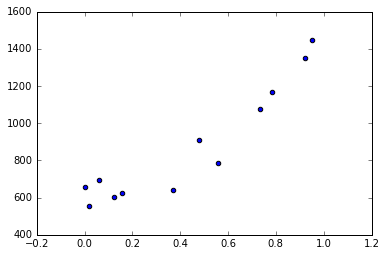

In [9]:
plt.scatter(dd, mean_df)

In [9]:
df_dict[2015].index

Int64Index([  22,   26,   59,   68,   77,   86,   93,   94,  101,  114,
            ...
            9932, 9933, 9935, 9937, 9938, 9939, 9942, 9971, 9981, 9982],
           dtype='int64', length=494)

In [10]:
df_dict[2016].index

Int64Index([  26,   59,   77,   86,   93,   94,  101,  114,  115,  160,
            ...
            9922, 9926, 9929, 9932, 9933, 9937, 9938, 9939, 9942, 9982],
           dtype='int64', length=347)